## **PyTorch Paper Replicating**

In this work, we will be replicating a machine learing research paper and creating a Vision Transformer (ViT) from scratch using PyTorch. Then we'll see how ViT, a state-of-the art computer vision architecture, performs on FoodVision Mini problem.

A machine learning research paper is often a presentation of months of work and experiments done by some of the best machine learning teams in the world condensed to few pages.
Replicating thr work of others is a fantastic way to practice our skills.


1. Download a Paper
2. Implement it
3. Repeat

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets

We will be using `helper_functions.py` code  file.

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from going_modular import data_setup, engine
from helper_functions import download_data, set_seeds, plot_loss_curves

In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


### Getting the data

In [7]:
train_dir = "data/pizza_steak_sushi/train"
test_dir = "data/pizza_steak_sushi/test"



### Making Datasets and DataLoaders

In [8]:
IMG_SIZE = 224

manual_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
])

print(f"Manually Created transforms: {manual_transforms}")

Manually Created transforms: Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
)


Let's male it to `DataLoader`, the ViT paper states the use of a batch size of 4096, which is 128x the size of the batch size we've been using (32). Having 4096 batch size means, 4096 images need to fit into the GPU memory, but I don't have the hardware to handle this. (I am not Google Research team)



In [9]:
BATCH_SIZE = 32

train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=manual_transforms,
    batch_size=BATCH_SIZE
)

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x775991148f50>,
 ['pizza', 'steak', 'sushi'])

#### Visualize

In [10]:
image_batch, label_batch = next(iter(train_dataloader))

image, label = image_batch[0], label_batch[0]

image.shape, label

(torch.Size([3, 224, 224]), tensor(1))

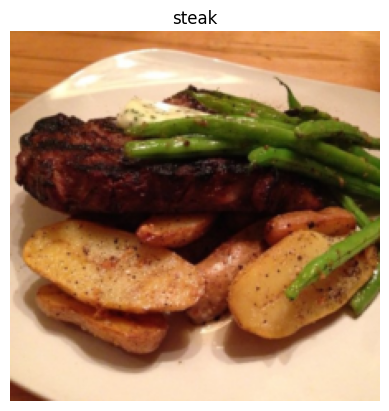

In [11]:
plt.imshow(image.permute(1, 2, 0)) # Permute to (H, W, C)
plt.title(class_names[label])
plt.axis(False)
plt.show()

## **ViT**

Our model inputs are: images of pizza, steak, and sushi
Our Ideal outputs are: predicted labels of pizza, steak or sushi

---

ViT is a deep learning neural network architecture, and any neural network architecture is generally comprised of layers, and a collection of layers is often referred to as a block, and stacking many blocks together is what gives us th whole architecture.

A layer takes an input, performs some kind of function on it, and then returns an output. So if a single layer takes an input and gives an output, then a collection of layers or a block also takes an input and gives an output.



### Architecture

The ViT architecture is comprised of several stages:

1. **Patch + Position Embedding (inputs)** - Turns the input image into a sequence of image patches and adds a position number to specify in what order the patch comes in.
2. **Linear Projection of flattened patches (Embedded Patches)** - The image patches get turned into an embedding, the benefit of using an embedding rather than just the image values is that an embedding is a *learnable representation* of the image that can improve with training.
3. **Norm** - This is short for Layer Normalization, `LayerNorm` a technique for regularizing (reducing overfitting) a neural network, we can use  `LayerNorm` via the PyTorch layer `torch.nn.LayerForm()`

4. **Multi-Head Attention** - This is a multi-headed self-attention layer or MSA for short. You can create an MSA layer via the PyTorch layer `torch.nn.MutliheadAttention()`

5. **Multi Layer Perceptron** - A MLP can often refer to any collection of feedforward layers. In the ViT paper, the authors refer to the MLP as the `MLP block` and it contains two `torch.nn.Linear()` layers with a `torch.nn.GELU()` non-linearity activation in between 

6. **Transformer Encoder** - The transformer encoder is a collection of the layers. There are two skip connections inside the Transformer encoder meaning the layer's input are fed directly to immediate layers as well as subsequent layers. The overall ViT architecture is comprised of a number of transformer encoders stacked on top of each other.

7. **MLP Head** - This is the output layer of the architecture, it converts the learned features of an input to a class output.



![Architecture](qc4pjd3z.png)